## Observations and Insights 

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [36]:
# Total rows
len(mouse_results)

1893

In [37]:
# Checking the number of mice. unique_value = data["Team"].nunique() 
total_mice = mouse_results['Mouse ID'].nunique()
total_mice

249

In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_results.loc[mouse_results.duplicated(['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_results.loc[mouse_results['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [40]:
clean_data = mouse_results[mouse_results['Mouse ID'].isin(duplicate_mice)==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [41]:
clean_data['Mouse ID'].nunique()

248

## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = clean_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = clean_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = clean_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sds = clean_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = clean_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_df = pd.DataFrame({'Means': means,
                          'Medians': medians,
                          'Variances': variances,
                          'Standard Deviation': sds,
                          'SEM': sems})
summary_df


,Means,Medians,Variances,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

# This method produces everything in a single groupby function


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [44]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_counts = clean_data['Drug Regimen'].value_counts()
drug_counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

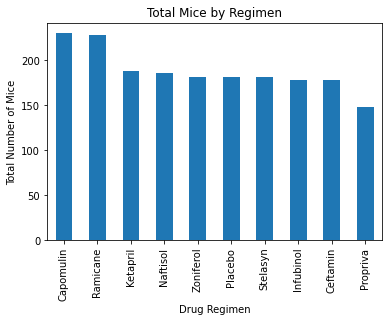

In [45]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_counts.plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.title("Total Mice by Regimen")
plt.show()

NameError: name 'np' is not defined

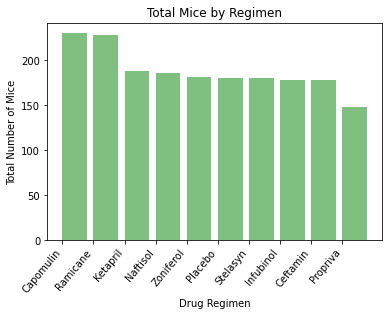

In [94]:
plt.bar(drug_counts.index.values, drug_counts.values, color='g', alpha=0.5, align="edge")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.title("Total Mice by Regimen")
plt.xticks (rotation=50, ha='right')
plt.yticks(np.arange(0,35,5))
plt.show()

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_counts = clean_data['Sex'].value_counts()
sex_counts

Male      958
Female    922
Name: Sex, dtype: int64

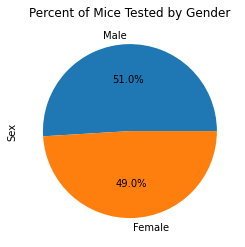

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts.plot(kind='pie', autopct = '%1.1f%%')
plt.title('Percent of Mice Tested by Gender')
plt.show()

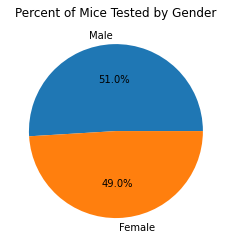

In [49]:
plt.pie(sex_counts.values, labels=sex_counts.index.values, autopct = '%1.1f%%')
plt.title('Percent of Mice Tested by Gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: # Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_data_maxtime = pd.merge(greatest_timepoint, clean_data, how='left', on='Mouse ID')
clean_data_maxtime

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,0,45.000000,0
1,a203,45,Infubinol,Female,20,23,5,48.508468,0
2,a203,45,Infubinol,Female,20,23,10,51.852437,1
3,a203,45,Infubinol,Female,20,23,15,52.777870,1
4,a203,45,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...,...
1875,z969,45,Naftisol,Male,9,30,25,63.145652,2
1876,z969,45,Naftisol,Male,9,30,30,65.841013,3
1877,z969,45,Naftisol,Male,9,30,35,69.176246,4
1878,z969,45,Naftisol,Male,9,30,40,70.314904,4


In [51]:
drug_tumor_vol = clean_data_maxtime.groupby('Drug Regimen')['Tumor Volume (mm3)'].sum()
drug_tumor_vol

Drug Regimen
Capomulin     9355.420462
Ceftamin      9361.228582
Infubinol     9413.493529
Ketapril     10384.299876
Naftisol     10105.671026
Placebo       9780.078122
Propriva      7743.497619
Ramicane      9169.417875
Stelasyn      9816.199991
Zoniferol     9689.044192
Name: Tumor Volume (mm3), dtype: float64

In [52]:
drug_reg = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol = [9355.42, 9169.42, 9413.49, 9361.23]
drug_tumor_vol_df = pd.DataFrame(tumor_vol,drug_reg)
drug_tumor_vol_df

,0
Capomulin,9355.42
Ramicane,9169.42
Infubinol,9413.49
Ceftamin,9361.23


In [53]:
# Put treatments into a list for for loop (and later for plot labels) # Capomulin, Ramicane, Infubinol, and Ceftamin
drug_reg = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for drug in drug_reg:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drugtumor_vol = clean_data_maxtime.loc[clean_data_maxtime['Drug Regimen'] == drug,'Tumor Volume (mm3)']
    # add subset
    tumor_vol.append(drugtumor_vol)
    
    quartiles = drugtumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"The lower quartile of {drug} is: {lowerq}\n"
          f"The upper quartile of {drug} is: {upperq}\n"
            f"The interquartile range of {drug} is: {iqr}\n"
               f"The the median of {drug} is: {quartiles[0.5]}\n"
                 f"Values below {lower_bound} could be outliers.\n"
                   f"Values above {upper_bound} could be outliers.")
      

The lower quartile of Capomulin is: 37.685932865
The upper quartile of Capomulin is: 45.0
The interquartile range of Capomulin is: 7.314067135000002
The the median of Capomulin is: 41.557808879999996
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.
The lower quartile of Ramicane is: 36.67463458499999
The upper quartile of Ramicane is: 45.0
The interquartile range of Ramicane is: 8.325365415000007
The the median of Ramicane is: 40.67323554
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.
The lower quartile of Infubinol is: 47.3123533
The upper quartile of Infubinol is: 57.314443967500004
The interquartile range of Infubinol is: 10.002090667500006
The the median of Infubinol is: 51.82058438
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.
The lower quartile of Ceftamin is: 47.208427112500004
The upper quartile of Ceftamin is: 56.8014375700

In [54]:
drug_reg

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [55]:
tumor_vol

[174     45.000000
 175     45.651331
 176     43.270852
 177     43.784893
 178     42.731552
           ...    
 1818    38.992734
 1819    35.726023
 1820    36.327870
 1821    31.475411
 1822    31.896238
 Name: Tumor Volume (mm3), Length: 230, dtype: float64,
 57      45.000000
 58      45.466677
 59      40.759788
 60      41.484169
 61      38.087373
           ...    
 1845    37.414114
 1846    37.815935
 1847    38.504824
 1848    34.022093
 1849    30.638696
 Name: Tumor Volume (mm3), Length: 228, dtype: float64,
 0       45.000000
 1       48.508468
 2       51.852437
 3       52.777870
 4       55.173336
           ...    
 1855    54.316407
 1856    56.286750
 1857    58.628399
 1858    60.053740
 1859    62.754451
 Name: Tumor Volume (mm3), Length: 178, dtype: float64,
 30      45.000000
 31      46.795257
 32      47.371343
 33      49.734404
 34      50.513437
           ...    
 1828    57.173538
 1829    59.033275
 1830    61.153140
 1831    63.469549
 1832    64.729

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


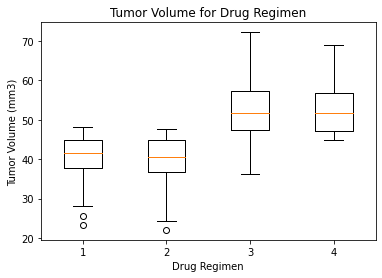

In [85]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol)
plt.show()

## Line and Scatter Plots

In [57]:
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [58]:
# Pull mice on Capomulin Regimen --> x401
cap_mice = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin','Mouse ID']
cap_mice.head()

10    s185
11    s185
12    s185
13    s185
14    s185
Name: Mouse ID, dtype: object

In [59]:
# Mouse x401 tumor volume data
cap_mouse_tumor = clean_data.loc[clean_data['Mouse ID'] == 'x401', 'Tumor Volume (mm3)']
cap_mouse_tumor

20    45.000000
21    45.473753
22    39.113891
23    39.776250
24    36.065835
25    36.617120
26    32.915292
27    30.206825
28    28.167397
29    28.484033
Name: Tumor Volume (mm3), dtype: float64

In [60]:
# Mouse x401 timepoint data
cap_mouse_time = clean_data.loc[clean_data['Mouse ID'] == 'x401', 'Timepoint']
cap_mouse_time

20     0
21     5
22    10
23    15
24    20
25    25
26    30
27    35
28    40
29    45
Name: Timepoint, dtype: int64

Text(0, 0.5, 'Tumor Volume (mm3')

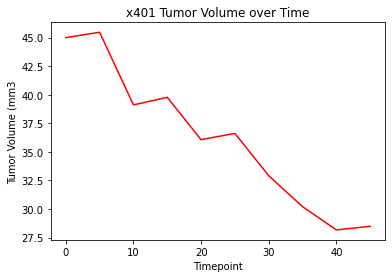

In [61]:
# Generate a line plot of time point versus tumor volume for mouse x401 treated with Capomulin
x401_time_tumor = plt.plot(cap_mouse_time, cap_mouse_tumor, color="red", label="Tumor Volume over time")
plt.title("x401 Tumor Volume over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3")

In [69]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
cap

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [70]:
# Calculate mouse weight
mouse_weight = cap.groupby('Mouse ID')['Weight (g)'].mean()
mouse_weight

Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
i557    24
i738    20
j119    23
j246    21
l509    21
l897    19
m601    17
m957    19
r157    25
r554    17
r944    25
s185    17
s710    23
t565    17
u364    17
v923    21
w150    23
w914    21
x401    15
y793    17
Name: Weight (g), dtype: int64

In [68]:
# Calculate average tumor volume per mouse
avg_tumor_vol = cap.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_tumor_vol

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

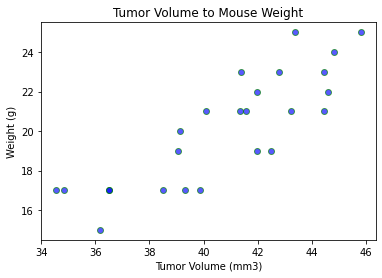

In [71]:
plt.scatter(avg_tumor_vol, mouse_weight, marker="o", facecolors="blue", edgecolors="green", alpha=0.65)
plt.title('Tumor Volume to Mouse Weight')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [73]:
# Calculate the correlation coefficient
print(f"The correlation coefficient between Tumor Volume (mm3) and Mouse Weight (g) is {round(st.pearsonr(avg_tumor_vol,mouse_weight)[0],2)}")



The correlation coefficient between Tumor Volume (mm3) and Mouse Weight (g) is 0.84


The r-squared is: 0.7088568047708717


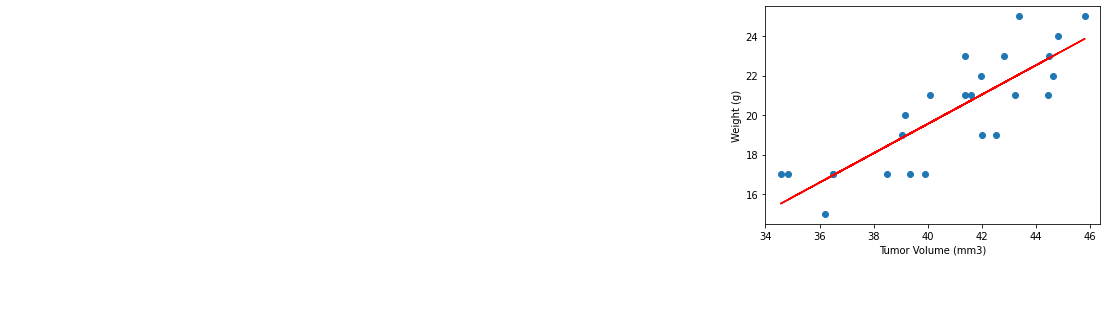

In [77]:
# linear regression model 
x_values = avg_tumor_vol
y_values = mouse_weight
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
print(f"The r-squared is: {rvalue**2}")
plt.show()